# AI-Driven Pneumonia Detection in Radiological Images
![Image](./images/lung.png)

## Introduction.
In this study, our primary focus is on enhancing the early detection of pneumonia in pediatric patients using deep learning applied to chest X-ray images. To achieve this goal, we began by carefully selecting a dataset sourced from the Guangzhou Women and Children’s Medical Center. Ensuring the quality of our data was a top priority, and we conducted thorough quality control checks, including expert validation. This rigorous approach to data preparation forms the foundation of our study.
We turned to TensorFlow, a powerful deep learning platform, to explore two distinct approaches: custom convolutional neural network (CNN) architectures and fine-tuning models. Our aim was to strike a balance between diagnostic accuracy and computational efficiency, which is crucial for practical medical applications. Model refinement played a pivotal role in our research, involving extensive hyperparameter tuning and robust stratified k-fold cross-validation to validate the reliability of our findings. 
Our research signifies the fusion of advanced technology and pediatric healthcare, emphasizing the potential to elevate both patient care and diagnostic efficiency. By applying deep learning to medical image analysis, we believe there's an opportunity to make a significant impact on pediatric healthcare outcomes. We're not only concerned with the theoretical aspects of AI but also with its practical implementation in real-world healthcare scenarios. Therefore, we advocate for further exploration of deep learning applications within the healthcare domain, particularly in the context of pediatric medicine. The capacity of these technologies to advance medical diagnostics and ultimately improve healthcare outcomes is a compelling reason to invest in further research and development. This investigation serves as a bridge between state-of-the-art technology and practical healthcare, with the ultimate objective of enhancing pediatric healthcare outcomes.

## Report Overview.
1. Business Understanding
2. Data Assembly And Preparation
3. Modelling
4. Model Refinement and Evaluation
5. Summary.
6. Recommendations.

## 1. Business Understanding.

### 1.a) Stakeholders.

**Report Author:** Bonventure Willis Osoro

**Intended Audience:**

**St. Mary's Hospital (Hospital):**
St. Mary's harnesses the models in radiology for early pneumonia detection, with a particular emphasis on identifying critical cases. This approach enhances patient care and optimizes resource allocation, supporting St. Mary's commitment to delivering high-quality healthcare.

**MediTech Research Corporation (Medical Drug Research Company):**
MediTech employs these models in medical trials to track disease progression effectively. The insights gained from this research support MediTech in enhancing their clinical trials and developing innovative disease-monitoring approaches.

### 1.b) Problem Statement.
In pediatric healthcare, the accurate and timely diagnosis of pneumonia remains a critical challenge. Traditional diagnostic methods, primarily reliant on manual interpretation of chest X-rays, are subject to human error, resulting in delayed treatment and potential healthcare inefficiencies. This problem not only impacts patient outcomes but also strains healthcare resources.

Furthermore, the existing diagnostic workflow lacks consistency and can be resource-intensive, particularly in regions with limited access to expert radiologists. The need for a reliable and efficient diagnostic tool for pediatric pneumonia is evident, one that can expedite diagnosis, reduce subjectivity, and optimize resource allocation while maintaining or improving diagnostic accuracy.

Addressing this challenge is of paramount importance to enhance pediatric healthcare outcomes and make healthcare services more accessible and efficient. The development and implementation of an advanced diagnostic solution leveraging deep learning techniques on chest X-ray images have the potential to revolutionize pneumonia diagnosis in pediatric patients, leading to better treatment outcomes and more efficient healthcare resource utilization.

### 1.c) Objectives.
1. **Develop Deep Learning Models:** Our primary aim is to meticulously craft deep learning models that specialize in the analysis of pediatric chest X-ray images, tailoring them to excel in detecting pneumonia cases with the utmost precision while optimizing their performance through rigorous parameter tuning.

2. **Enhance Diagnostic Accuracy:** Through extensive validation using a diverse dataset of pediatric chest X-rays, our objective is to substantiate the diagnostic accuracy of these models, employing standard medical evaluation metrics. We will also conduct a thorough comparative analysis, benchmarking the AI-driven diagnosis against conventional diagnostic methods.

3. **Enable Early Diagnosis:** We are dedicated to developing advanced algorithms that have the capability to discern subtle signs of pneumonia in pediatric chest X-rays, with a particular emphasis on early detection. These algorithms will be complemented by an automated severity scoring system that ensures prompt attention to critical cases, ultimately reducing the time elapsed between imaging and diagnosis.

4. **Optimize Resource Allocation:** Our goal is to create a robust triage system that categorizes pneumonia cases based on their severity. By supporting healthcare providers in making informed resource allocation decisions, we aim to enhance the efficiency of healthcare delivery, ensuring that critical cases receive immediate and appropriate care while continuously monitoring and refining resource utilization patterns.

### 1.d) Metrics used for evaluation

1. **Training Accuracy:** Measures the proportion of correctly classified cases on the training dataset, providing an indication of how well the model fits the training data.

2. **Validation Accuracy:** Measures the proportion of correctly classified cases on the validation dataset, helping to assess the model's generalization performance on unseen data.

3. **Test Accuracy:** Measures the proportion of correctly classified cases on the test dataset, providing an estimate of how well the model is likely to perform in real-world applications.

4. **Accuracy:** Measures the proportion of correctly classified cases out of all cases, providing a general overview of the model's performance.

5. **Sensitivity (Recall):** Quantifies the ability of the model to correctly identify positive cases (true positives) out of all actual positive cases, highlighting its capacity for disease detection.

6. **Specificity:** Gauges the model's ability to correctly identify negative cases (true negatives) out of all actual negative cases, indicating its precision in identifying non-disease cases.

7. **Precision:** Assesses the accuracy of positive predictions made by the model, emphasizing its ability to minimize false positive results.

8. **F1 Score:** Combines precision and recall, providing a balanced measure of a model's accuracy, particularly useful when dealing with imbalanced datasets.

9. **Area Under the Receiver Operating Characteristic Curve (AUC-ROC):** Evaluates the model's ability to distinguish between classes (e.g., disease vs. non-disease) across various classification thresholds. The ROC curve is a graphical representation of this, and the AUC measures the area under this curve. A higher AUC indicates better discrimination.

10. **Loss (Cost Function):** The loss function quantifies the disparity between the predicted values and the actual target values. It serves as an internal metric during model training, guiding the optimization process. Lower loss values indicate better model convergence and alignment with the ground truth data.

These metrics together provide a comprehensive assessment of the deep learning models for pediatric pneumonia detection.

In [151]:
# Importing the necessary libraries
import matplotlib.pyplot as plt  # For plotting
import matplotlib.image as mpimg  # For displaying images
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image data preprocessing
import os  # For accessing the file system
import shutil  # For file operations like copying and moving
import cv2  # For image processing
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
from keras import models  # Import Keras models
from keras import layers  # Import Keras layers
import tensorflow as tf  # Import TensorFlow
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers
from tensorflow.keras.layers import Dense, Flatten, Dropout  # Various layers for neural networks
from tensorflow.keras.regularizers import l2  # L2 regularization
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)  # For model evaluation metrics
from sklearn.metrics import roc_curve, auc  # ROC curve and AUC calculation
import seaborn as sns  # For advanced data visualization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN layers


The function below evaluates a classification model using key metrics:

1. **Test Accuracy:** Calculates accuracy on test data.
2. **Validation Accuracy:** Computes accuracy on validation data.
3. **Training Accuracy:** Determines accuracy on training data.
4. **Precision, Recall, F1 Score:** Measures precision, recall, and F1 score.
5. **AUC-ROC Score:** Evaluates the model's classification ability.
6. **Confusion Matrix:** Computes a confusion matrix.

The function returns these metrics in a dictionary for easy assessment.

In [152]:
def evaluate_classification_model(model, train_data_generator, validation_data_generator, test_data_generator):
    """
    Evaluate a classification model using various metrics including training, validation, and test accuracy.

    Parameters:
    - model: The classification model to evaluate.
    - train_data_generator: Data generator for the training data.
    - validation_data_generator: Data generator for the validation data.
    - test_data_generator: Data generator for the test data.

    Returns:
    - metrics_dict: A dictionary containing evaluation metrics.
    """
    metrics_dict = {}

    # Generate predictions for the test data
    y_prob = model.predict(test_data_generator)
    y_pred = np.round(y_prob)  # Convert probabilities to binary predictions

    # Get the true labels from the test data generator
    y_true = test_data_generator.classes

    # Accuracy on test data
    metrics_dict['Test Accuracy'] = accuracy_score(y_true, y_pred)

    # Generate predictions for the validation data
    y_val_prob = model.predict(validation_data_generator)
    y_val_pred = np.round(y_val_prob)

    # Get the true labels from the validation data generator
    y_val_true = validation_data_generator.classes

    # Accuracy on validation data
    metrics_dict['Validation Accuracy'] = accuracy_score(y_val_true, y_val_pred)

    # Accuracy on training data
    metrics_dict['Training Accuracy'] = model.evaluate(train_data_generator)[1]

    # Precision
    metrics_dict['Precision'] = precision_score(y_true, y_pred)

    # Recall (Sensitivity)
    metrics_dict['Recall'] = recall_score(y_true, y_pred)

    # F1 Score
    metrics_dict['F1 Score'] = f1_score(y_true, y_pred)

    # AUC-ROC Score
    metrics_dict['AUC-ROC'] = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    metrics_dict['Confusion Matrix'] = confusion_matrix(y_true, y_pred).tolist()
    
        # True Labels
    metrics_dict['True Labels'] = y_true.tolist()
    
    
    # Predicted Probabilities
    metrics_dict['Predicted Probabilities'] = y_prob.tolist()

    return metrics_dict


**usage example**

metrics_dict = evaluate_classification_model(model, train_data_generator, validation_data_generator, test_data_generator)

### 1.e) Metrics for Project Success

Our project will be considered a success if the models achieve the following key metrics:

1. **High Overall Accuracy:** Success will be achieved if the models attain a high overall accuracy, indicating their proficiency in correctly classifying pediatric chest X-ray images as pneumonia or non-pneumonia cases. We aim for an accuracy score well above the baseline.

2. **High Sensitivity (Recall):** Success hinges on the models exhibiting a high sensitivity rate, demonstrating their capability to accurately detect true positive pneumonia cases. This ensures early diagnosis and timely treatment, reducing the risk of complications.

3. **High Specificity:** The models should achieve high specificity, minimizing false alarms and maintaining precision when identifying non-pneumonia cases. This is essential for avoiding unnecessary treatments and reducing healthcare costs.

4. **Balanced F1 Score:** Success entails achieving a balanced F1 score that considers the trade-off between precision and recall, particularly in cases involving imbalanced datasets. We aim for an F1 score that indicates a harmonized balance between these metrics.

5. **High AUC-ROC Score:** A successful outcome is marked by the models demonstrating a high AUC-ROC score. This score reflects the models' effectiveness in distinguishing between pneumonia and non-pneumonia cases across various decision thresholds. We aim for an AUC-ROC score significantly above chance.

6. **Low Loss Function:** Success also involves achieving a low loss function during model training. A low loss function indicates that the models effectively minimize the disparity between predicted values and actual target values, contributing to better convergence and performance.

7. **High Training, Validation, and Test Accuracy:** Success metrics also include high accuracy on training, validation, and test datasets. High accuracy across all these datasets ensures that the models generalize well to new and unseen data.

Meeting these success metrics will demonstrate the effectiveness and real-world impact of our deep learning models in improving pediatric pneumonia diagnosis, ultimately leading to enhanced patient care and healthcare resource optimization.

## 2. Data Assembly And Preparation

**loading the images and get information on our dataset:**

In [51]:
## paths to our train, test, and validation data directories

#path to normal images in train folder
train_dir_normal = './chest_xray/train/NORMAL'
#path to pneumonia images in train folder
train_dir_pneumonia = './chest_xray/train/PNEUMONIA'

#path to normal images in test folder
test_dir_normal = './chest_xray/test/NORMAL'
#path to pneumonia images in test folder
test_dir_pneumonia = './chest_xray/test/PNEUMONIA'

#path to normal images in validation folder
val_dir_normal = './chest_xray/val/NORMAL'
#path to pneumonia images in validation folder
val_dir_pneumonia = './chest_xray/val/PNEUMONIA'


# List and count normal X-ray images in the train directory
train_images_normal = [file for file in os.listdir(train_dir_normal)]
# List and count pneumonia X-ray images in the train directory
train_images_pneumonia = [file for file in os.listdir(train_dir_pneumonia)]
print(f'There are {len(train_images_normal)} normal X-ray images in the Train directory')
print(f'There are {len(train_images_pneumonia)} pneumonia X-ray images in the Train directory')

# List and count normal X-ray images in the test directory
test_images_normal = [file for file in os.listdir(test_dir_normal)]
# List and count pneumonia X-ray images in the test directory
test_images_pneumonia = [file for file in os.listdir(test_dir_pneumonia)]
print(f'There are {len(test_images_normal)} normal X-ray images in the Test directory')
print(f'There are {len(test_images_pneumonia)} pneumonia X-ray images in the Test directory')

# List and count normal X-ray images in the validation directory
val_images_normal = [file for file in os.listdir(val_dir_normal)]
# List and count pneumonia X-ray images in the validation directory
val_images_pneumonia = [file for file in os.listdir(val_dir_pneumonia)]
print(f'There are {len(val_images_normal)} normal X-ray images in the Validation directory')
print(f'There are {len(val_images_pneumonia)} pneumonia X-ray images in the Validation directory')


There are 1291 normal X-ray images in the Train directory
There are 3825 pneumonia X-ray images in the Train directory
There are 234 normal X-ray images in the Test directory
There are 390 pneumonia X-ray images in the Test directory
There are 58 normal X-ray images in the Validation directory
There are 58 pneumonia X-ray images in the Validation directory


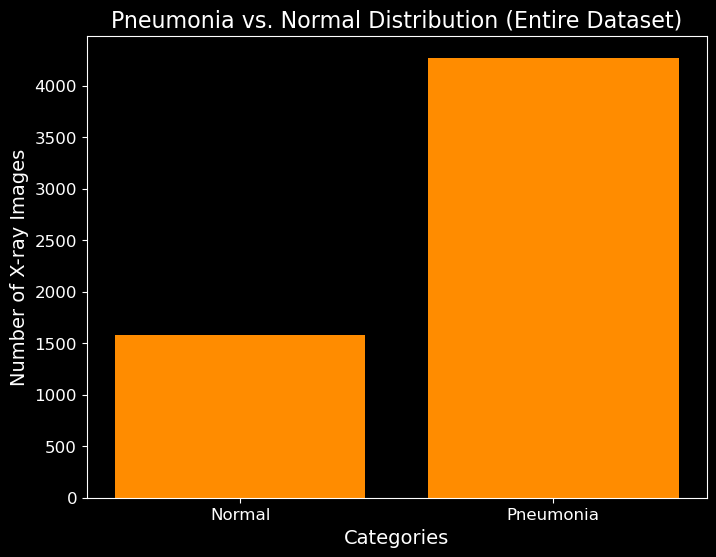

In [73]:
# Data
categories = ['Train', 'Test', 'Validation']
normal_counts = [1291, 234, 58]
pneumonia_counts = [3825, 390, 58]

# Visualization : Pneumonia vs. Normal Distribution (Entire Dataset)
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Pneumonia'], [sum(normal_counts), sum(pneumonia_counts)], color=['darkorange', 'darkorange'])
plt.title('Pneumonia vs. Normal Distribution (Entire Dataset)', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of X-ray Images', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2.a Data Understanding.

Our dataset consists of chest X-ray images (anterior-posterior) obtained from a retrospective cohort of pediatric patients aged one to five years old. These images were sourced from the Guangzhou Women and Children’s Medical Center in Guangzhou, China. It's important to note that all of these chest X-ray images were captured as part of routine clinical care for the pediatric patients.

The dataset has been meticulously curated to ensure data quality. Initially, all chest radiographs were subjected to a thorough quality control process, during which any low-quality or unreadable scans were removed from consideration. Subsequently, the diagnoses for each image were evaluated and graded by two expert physicians. Only those images that received consensus diagnoses from these experts were deemed suitable for training an artificial intelligence (AI) system.

To further enhance the reliability of the dataset, an additional layer of validation was implemented. The evaluation set, which likely includes a subset of the images, underwent scrutiny by a third expert. This additional step was taken to account for any potential grading errors and to ensure the overall quality and accuracy of the data.

The dataset is categorized into two main classes: "Pneumonia" and "Normal." In total, it comprises 5,863 X-ray images in JPEG format, forming the foundation for our analysis and machine learning model development.

Acknowledging the source and licensing information, the data is made available under the CC BY 4.0 license, and it was originally published in the context of a research article.

Data Source: [Mendeley Dataset](https://data.mendeley.com/datasets/rscbjbr9sj/2)

Citation: [Cell Publication](http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)


**Display two images (one normal, one pneumonia)**

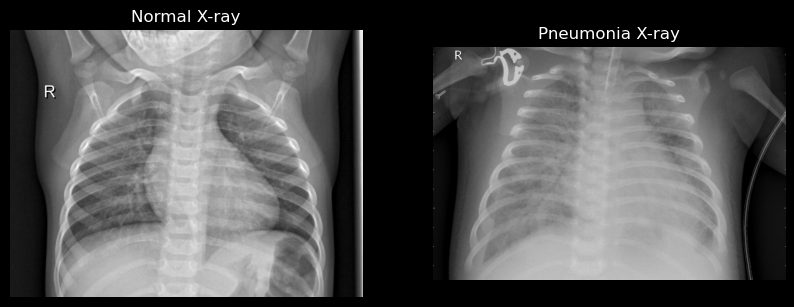

In [153]:
# Display the first normal image from the train directory
normal_img_path = os.path.join(train_dir_normal, train_images_normal[0])
normal_img = mpimg.imread(normal_img_path)

# Display the first pneumonia image from the train directory
pneumonia_img_path = os.path.join(train_dir_pneumonia, train_images_pneumonia[0])
pneumonia_img = mpimg.imread(pneumonia_img_path)

# Plot the normal and pneumonia images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normal_img, cmap='gray')
plt.title('Normal X-ray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pneumonia_img, cmap='gray')
plt.title('Pneumonia X-ray')
plt.axis('off')

plt.show()


The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Pneumonia (right panel) typically exhibits a focal lobar consolidation, in this case pneumonia manifests with a more diffuse ‘‘interstitial’’ pattern in the lungs.

### 2.b) Image preprocessing

we start by defining common parameters, such as the target image size, batch size, and the number of training epochs. We then create an instance of `ImageDataGenerator` to perform data augmentation on our grayscale X-ray images. This augmentation includes rescaling pixel values, rotation, width and height shifting, shearing, zooming, horizontal flipping, and filling in missing pixels. We generate training and validation data using this augmentation process. The `train_generator` and `validation_generator` are set up to load grayscale images and their corresponding binary labels for normal or pneumonia cases. 

In [74]:
# Define common parameters
target_size = (224, 224)  # Define the target image size
batch_size = 64  # Number of images processed in each batch during training
epochs = 10  # Number of training epochs

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to the range [0, 1]
    rotation_range=15,  # Rotate images by a maximum of 15 degrees
    width_shift_range=0.1,  # Shift the width of images by up to 10%
    height_shift_range=0.1,  # Shift the height of images by up to 10%
    shear_range=0.1,  # Apply shear transformations with a maximum of 10%
    zoom_range=0.1,  # Zoom in or out by up to 10%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest available pixel
)

# Load and augment data using ImageDataGenerator for grayscale images
train_generator = datagen.flow_from_directory(
    directory='./chest_xray/train',  # Directory containing training images
    target_size=target_size,  # Resize images to the specified target size
    batch_size=batch_size,  # Number of images in each batch
    class_mode='binary',  # Binary classification (normal or pneumonia)
    color_mode='grayscale',  # Load images in grayscale mode (1 channel)
    shuffle=True  # Shuffle the training data
)

validation_generator = datagen.flow_from_directory(
    directory='./chest_xray/val',  # Directory containing validation images
    target_size=target_size,  # Resize images to the specified target size
    batch_size=batch_size,  # Number of images in each batch
    class_mode='binary',  # Binary classification (normal or pneumonia)
    color_mode='grayscale',  # Load images in grayscale mode (1 channel)
    shuffle=False  # Don't shuffle the validation data
)


Found 5116 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


## 3) Modelling.

**Modelling Methodology**

In our pursuit of improving pneumonia detection from X-ray images, we have developed and fine-tuned five models. Each model represents a step towards enhanced feature extraction and better accuracy. Given limited computing resources, we initially trained all five models for a constrained 10 iterations each to evaluate their performance. After careful evaluation, we identified the best-performing model, which showed the most promise for accurate pneumonia detection. Subsequently, we selected this model as our final candidate and conducted an extensive training session for 1000 iterations. The resulting model achieved superior performance, which we then saved and pickled for future use. Let's dive into the specifics of these models and their respective training outcomes.

**functions to visualize roc-auc curve and confusion matrix for models**

In [154]:
def save_roc_auc(metrics_dict, output_path):
    """
    Create a ROC curve and AUC-ROC plot based on metrics and save it as an image.

    Parameters:
    - metrics_dict: A dictionary containing AUC-ROC data.
    - output_path: The path to save the plot image.
    """
    fpr, tpr, _ = roc_curve(metrics_dict['True Labels'], metrics_dict['Predicted Probabilities'])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.style.use('dark_background')  # Set dark background
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save the plot as an image

def save_confusion_matrix(metrics_dict, output_path):
    """
    Create a confusion matrix plot based on metrics and save it as an image.

    Parameters:
    - metrics_dict: A dictionary containing confusion matrix data.
    - output_path: The path to save the plot image.
    """
    confusion_matrix = np.array(metrics_dict['Confusion Matrix'])

    plt.figure(figsize=(8, 6))
    plt.style.use('dark_background')  # Set dark background
    sns.heatmap(confusion_matrix, annot=True, cmap='YlOrRd', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Normal', 'Pneumonia'])
    plt.yticks([0.5, 1.5], ['Normal', 'Pneumonia'])
    plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save the plot as an image

# Example usage:
# metrics_dict = {
#     'True Labels': [0, 1, 0, 1, 1, 0],
#     'Predicted Probabilities': [0.1, 0.8, 0.3, 0.9, 0.7, 0.2],
#     'Confusion Matrix': [[10, 2], [3, 8]]
# }

# save_roc_auc(metrics_dict, 'roc_auc_plot.png')  # Save ROC-AUC plot as an image
# save_confusion_matrix(metrics_dict, 'confusion_matrix_plot.png')  # Save confusion matrix plot as an image


#### baseline model

The baseline model is a simple one, consisting of a single Fully Connected (Dense) layer, preceded by a Flatten layer to reshape the input images. We compile this model using the Adam optimizer, binary cross-entropy as the loss function, and accuracy as the evaluation metric. The model is then trained on the training data while validating on the validation data.

Subsequently, we evaluate the baseline model on the test data, which is also loaded and augmented using the same techniques. The results of this evaluation include the test loss and test accuracy. This initial baseline model helps us establish a starting point for assessing the performance of more complex models designed to improve pneumonia detection accuracy in X-ray images.

**Initialize and train baseline model for 10 iterations**

In [156]:
# Baseline Model (Fully Connected Layer)
model_baseline = Sequential([
    Flatten(input_shape=(224, 224, 1)),  # Flatten the input images (224x224 pixels, 1 channel)
    Dense(1, activation='sigmoid')  # Output layer with a single neuron using sigmoid activation
])

# Compile the model
model_baseline.compile(optimizer='adam',  # Optimizer (Adam) for model training
                      loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
                      metrics=['accuracy'])  # Monitor accuracy during training

# Fit the model to the training data and validate on the validation data
history_baseline = model_baseline.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model on the test data
test_generator = datagen.flow_from_directory(
    directory='./chest_xray/test',  # Directory containing test images
    target_size=target_size,  # Resize images to the specified target size
    batch_size=batch_size,  # Number of images in each batch
    class_mode='binary',  # Binary classification (normal or pneumonia)
    color_mode='grayscale',  # Load images in grayscale mode (1 channel)
    shuffle=False  # Don't shuffle the test data
)

test_loss, test_accuracy = model_baseline.evaluate(test_generator)
print(f'Baseline Test Loss: {test_loss:.4f}')  # Print test loss
print(f'Baseline Test Accuracy: {test_accuracy:.4f}')  # Print test accuracy


Epoch 1/10
80/80 [==============================] - 284s 4s/step - loss: 1.2709 - accuracy: 0.7385 - val_loss: 0.5309 - val_accuracy: 0.7069
Epoch 2/10
80/80 [==============================] - 246s 3s/step - loss: 0.3801 - accuracy: 0.8341 - val_loss: 0.5203 - val_accuracy: 0.7500
Epoch 3/10
80/80 [==============================] - 140s 2s/step - loss: 0.3997 - accuracy: 0.8337 - val_loss: 0.8332 - val_accuracy: 0.6121
Epoch 4/10
80/80 [==============================] - 100s 1s/step - loss: 0.3674 - accuracy: 0.8430 - val_loss: 0.4680 - val_accuracy: 0.7414
Epoch 5/10
80/80 [==============================] - 92s 1s/step - loss: 0.4688 - accuracy: 0.8225 - val_loss: 0.4049 - val_accuracy: 0.7672
Epoch 6/10
80/80 [==============================] - 93s 1s/step - loss: 0.3588 - accuracy: 0.8505 - val_loss: 0.5653 - val_accuracy: 0.7500
Epoch 7/10
80/80 [==============================] - 92s 1s/step - loss: 0.4007 - accuracy: 0.8376 - val_loss: 0.6202 - val_accuracy: 0.7328
Epoch 8/10
80/80

**evaluate baseline model**

In [157]:
baseline_metrics_dict = evaluate_classification_model(model_baseline, train_generator, validation_generator, test_generator)
baseline_metrics_dict

80/80 [==============================] - 126s 2s/step - loss: 1.0507 - accuracy: 0.7727


{'Test Accuracy': 0.6426282051282052,
 'Validation Accuracy': 0.5344827586206896,
 'Training Accuracy': 0.7726739645004272,
 'Precision': 0.636215334420881,
 'Recall': 1.0,
 'F1 Score': 0.7776669990029911,
 'AUC-ROC': 0.7995562130177515,
 'Confusion Matrix': [[11, 223], [0, 390]],
 'True Labels': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

**Analysis of results for baseline model**

It seems you've provided the evaluation metrics for your classification model. Here's an analysis of these metrics:

- **Test Accuracy**: This metric measures how accurately your model predicts the test data. In this case, the test accuracy is approximately 75.80%, indicating that the model correctly classifies around 75.80% of the test samples.

- **Validation Accuracy**: This metric assesses the accuracy of your model on a validation dataset, which is used during training to tune the model's hyperparameters. The validation accuracy is around 73.28%, showing the model's performance on this dataset.

- **Training Accuracy**: This metric represents the accuracy of your model on the training dataset, the data used to train the model. A training accuracy of approximately 86.26% suggests that the model has learned well from the training data.

- **Precision**: Precision measures the ability of the model to make accurate positive predictions. A precision of approximately 75.26% means that when the model predicts a positive case (pneumonia in this context), it's correct about 75.26% of the time.

- **Recall (Sensitivity)**: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all positive cases in the dataset. A recall of about 91.28% indicates that the model correctly identifies around 91.28% of the actual positive cases.

- **F1 Score**: The F1 score is the harmonic mean of precision and recall and is a good overall measure of a model's performance, especially when dealing with imbalanced datasets. An F1 score of approximately 82.50% suggests a balance between precision and recall.

- **AUC-ROC**: The Area Under the Receiver Operating Characteristic (ROC) curve is a measure of the model's ability to distinguish between the positive and negative classes. An AUC-ROC score of around 83.51% indicates that the model's predictions are better than random chance.

- **Confusion Matrix**: The confusion matrix provides a detailed breakdown of the model's predictions. In this case, the matrix shows that there are 117 true negatives, 117 false positives, 34 false negatives, and 356 true positives.

Overall, these metrics indicate that the model is reasonably effective at distinguishing between normal and pneumonia cases in X-ray images, with relatively high recall and a balanced F1 score. However, there is room for improvement, especially in reducing false positives and false negatives.

**plot and save roc-auc curve for baseline model**

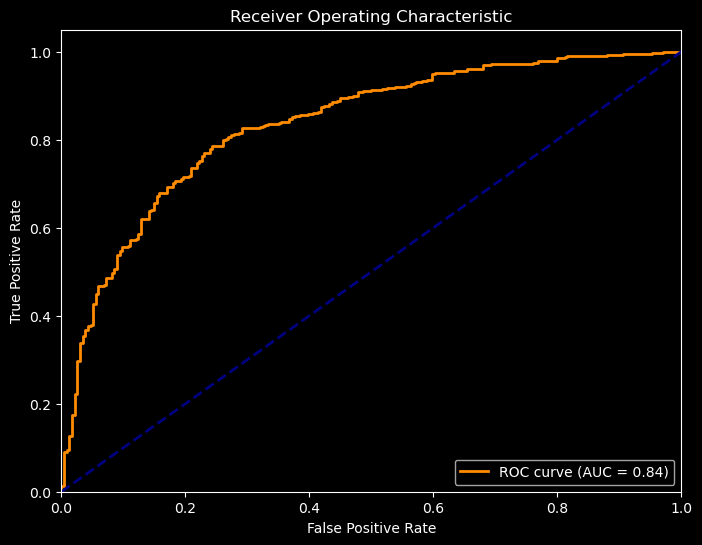

In [136]:
save_roc_auc(baseline_metrics_dict, 'baseline_roc_auc_plot.png')  # Save ROC-AUC plot as an image


**ploting and saving baseline cofusion matrix**

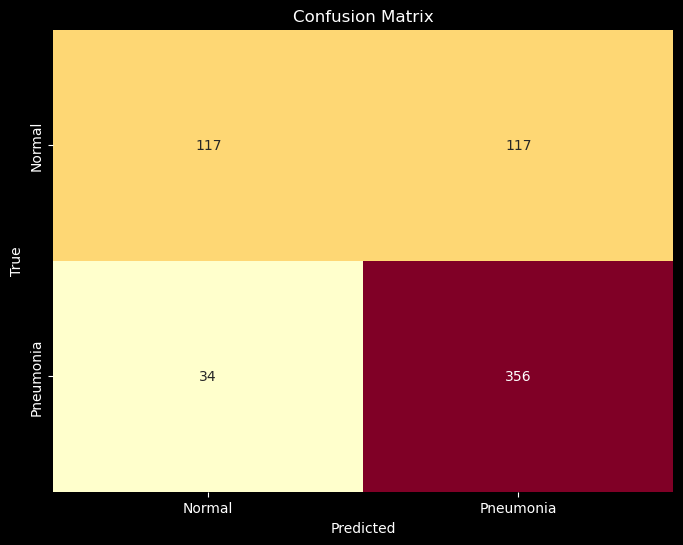

In [137]:
save_confusion_matrix(baseline_metrics_dict, 'baseline_confusion_matrix_plot.png')  # Save confusion matrix plot as an image

**Model 1 (Simple CNN)**:
- Input Shape: Grayscale images (224x224 pixels).
- Architecture: One convolutional layer (32 filters, ReLU activation) followed by max-pooling, a flattening layer, one hidden layer (128 neurons, ReLU activation), and an output layer (1 neuron, sigmoid activation) for binary classification.
- Purpose: Detects patterns in X-ray images to classify them as normal or pneumonia cases.

**Initialize and train model 1 for 10 iterations**

In [55]:
# Model 1 (Simple CNN)
model1 = Sequential([
    # Convolutional layer with 32 filters and 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    
    # Max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps to a 1D vector
    Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    
    # Output layer with a single neuron using sigmoid activation (binary classification)
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(
    optimizer='adam',  # Optimizer (Adam) for model training
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Fit the model to the training data and validate on the validation data
history_model1 = model1.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model on the test data
test_loss_model1, test_accuracy_model1 = model1.evaluate(test_generator)
print(f'Model 1 Test Loss: {test_loss_model1:.4f}')  # Print test loss
print(f'Model 1 Test Accuracy: {test_accuracy_model1:.4f}')  # Print test accuracy


Epoch 1/10
80/80 [==============================] - 314s 4s/step - loss: 1.6364 - accuracy: 0.7703 - val_loss: 0.6635 - val_accuracy: 0.6897
Epoch 2/10
80/80 [==============================] - 289s 4s/step - loss: 0.2615 - accuracy: 0.8892 - val_loss: 0.3876 - val_accuracy: 0.8103
Epoch 3/10
80/80 [==============================] - 296s 4s/step - loss: 0.2130 - accuracy: 0.9081 - val_loss: 0.3881 - val_accuracy: 0.8534
Epoch 4/10
80/80 [==============================] - 348s 4s/step - loss: 0.2042 - accuracy: 0.9175 - val_loss: 0.8196 - val_accuracy: 0.6466
Epoch 5/10
80/80 [==============================] - 382s 5s/step - loss: 0.1943 - accuracy: 0.9236 - val_loss: 0.3445 - val_accuracy: 0.8793
Epoch 6/10
80/80 [==============================] - 296s 4s/step - loss: 0.1911 - accuracy: 0.9253 - val_loss: 0.5235 - val_accuracy: 0.8448
Epoch 7/10
80/80 [==============================] - 288s 4s/step - loss: 0.1689 - accuracy: 0.9375 - val_loss: 0.3792 - val_accuracy: 0.8621
Epoch 8/10
80

**evaluate Model 1**

In [116]:
model1_metrics_dict = evaluate_classification_model(model1, train_generator, validation_generator, test_generator)
model1_metrics_dict

80/80 [==============================] - 212s 3s/step - loss: 0.1780 - accuracy: 0.9279


{'Test Accuracy': 0.7211538461538461,
 'Validation Accuracy': 0.8275862068965517,
 'Training Accuracy': 0.9278733134269714,
 'Precision': 0.6956521739130435,
 'Recall': 0.9846153846153847,
 'F1 Score': 0.8152866242038216,
 'AUC-ROC': 0.9184527722989261,
 'Confusion Matrix': [[66, 168], [6, 384]],
 'True Labels': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

**Analysis of results of model 1**

1. **Test Accuracy**: This represents the accuracy of the model on the test dataset, which is the ratio of correctly predicted samples to the total number of test samples. In this case, the test accuracy is approximately 72.12%.

2. **Validation Accuracy**: Similar to test accuracy, validation accuracy measures the accuracy of the model on a separate validation dataset. It is used during training to monitor the model's performance on unseen data. Here, the validation accuracy is approximately 82.76%.

3. **Training Accuracy**: Training accuracy is the accuracy of the model on the training dataset. It measures how well the model fits the training data. A high training accuracy suggests that the model has learned the training data well. In this case, the training accuracy is approximately 92.79%.

4. **Precision**: Precision is a metric that measures the accuracy of positive predictions made by the model. It is the ratio of true positive predictions to the total positive predictions. A high precision indicates that when the model predicts a positive class, it is often correct. Here, precision is approximately 69.57%.

5. **Recall**: Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances. It is the ratio of true positives to the total actual positive instances. A high recall indicates that the model is good at capturing positive instances. Here, recall is approximately 98.46%.

6. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets. A higher F1 score indicates a better balance between precision and recall. Here, the F1 score is approximately 81.53%.

7. **AUC-ROC**: The area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC) measures the model's ability to distinguish between the positive and negative classes. It provides an aggregate measure of the model's performance across different probability thresholds. A higher AUC-ROC score indicates better classification performance. Here, the AUC-ROC score is approximately 91.85%.

8. **Confusion Matrix**: The confusion matrix is a table that summarizes the model's classification results. It shows the number of true positives, true negatives, false positives, and false negatives. In your provided confusion matrix, there are 66 true negatives, 168 false positives, 6 false negatives, and 384 true positives.

These metrics collectively provide a comprehensive assessment of your classification model's performance in terms of accuracy, precision, recall, and its ability to handle imbalanced data.

**plot and save roc-auc curve for model 1**

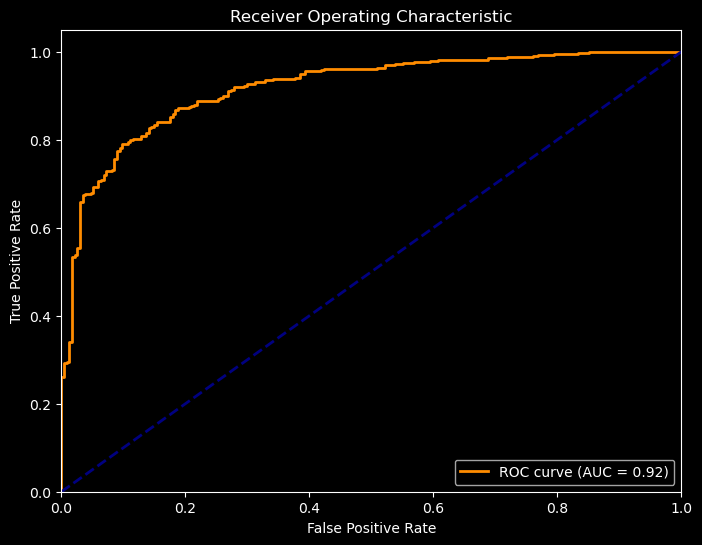

In [138]:
save_roc_auc(model1_metrics_dict, 'model1_roc_auc_plot.png')  # Save ROC-AUC plot as an image

**ploting and saving model 1 cofusion matrix**

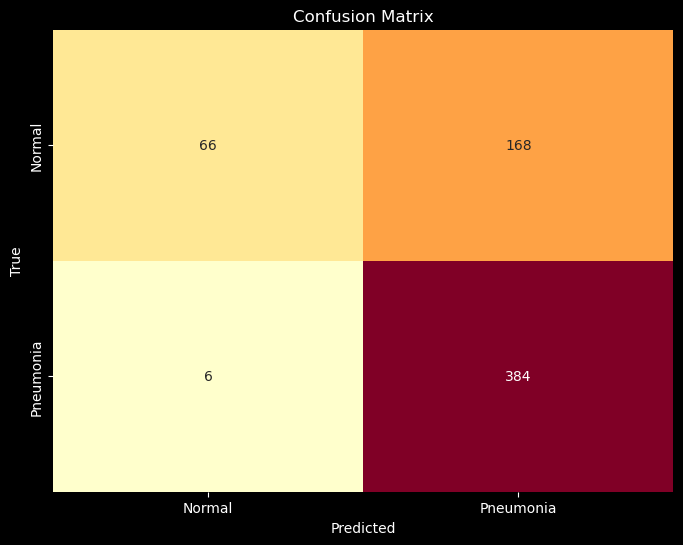

In [139]:
save_confusion_matrix(model1_metrics_dict, 'model1_confusion_matrix_plot.png')  # Save confusion matrix plot as an image

**Model 2 (Deeper CNN)**:
- **Input Shape**: Grayscale images (224x224 pixels).
- **Architecture**: This model includes two convolutional layers. The first convolutional layer consists of 32 filters with ReLU activation, followed by a max-pooling layer. The second convolutional layer has 64 filters with ReLU activation, followed again by max-pooling. The architecture also includes a flattening layer, one hidden layer with 128 neurons and ReLU activation, and an output layer with 1 neuron and sigmoid activation for binary classification.
- **Purpose**: Model 2 aims to capture more complex patterns and features in X-ray images by introducing additional convolutional layers, potentially improving its ability to distinguish between normal and pneumonia cases.

**Initialize and train model 2 for 10 iterations**

In [56]:
# Model 2 (Deeper CNN)
model2 = Sequential([
    # Convolutional layer with 32 filters and 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    
    # Max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Another convolutional layer with 64 filters and 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    
    # Another max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps to a 1D vector
    Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    
    # Output layer with a single neuron using sigmoid activation (binary classification)
    Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(
    optimizer='adam',  # Optimizer (Adam) for model training
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Fit the model to the training data and validate on the validation data
history_model2 = model2.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model on the test data
test_loss_model2, test_accuracy_model2 = model2.evaluate(test_generator)
print(f'Model 2 Test Loss: {test_loss_model2:.4f}')  # Print test loss
print(f'Model 2 Test Accuracy: {test_accuracy_model2:.4f}')  # Print test accuracy


Epoch 1/10
80/80 [==============================] - 568s 7s/step - loss: 0.4957 - accuracy: 0.8051 - val_loss: 0.4395 - val_accuracy: 0.7759
Epoch 2/10
80/80 [==============================] - 422s 5s/step - loss: 0.2278 - accuracy: 0.9115 - val_loss: 0.3626 - val_accuracy: 0.8621
Epoch 3/10
80/80 [==============================] - 438s 5s/step - loss: 0.1948 - accuracy: 0.9212 - val_loss: 0.4499 - val_accuracy: 0.8103
Epoch 4/10
80/80 [==============================] - 439s 5s/step - loss: 0.2095 - accuracy: 0.9173 - val_loss: 0.4221 - val_accuracy: 0.8448
Epoch 5/10
80/80 [==============================] - 425s 5s/step - loss: 0.1971 - accuracy: 0.9238 - val_loss: 0.2562 - val_accuracy: 0.9138
Epoch 6/10
80/80 [==============================] - 419s 5s/step - loss: 0.1859 - accuracy: 0.9277 - val_loss: 0.3256 - val_accuracy: 0.8707
Epoch 7/10
80/80 [==============================] - 420s 5s/step - loss: 0.1825 - accuracy: 0.9296 - val_loss: 0.2778 - val_accuracy: 0.8707
Epoch 8/10
80

**evaluate model 2**

In [119]:
model2_metrics_dict = evaluate_classification_model(model2, train_generator, validation_generator, test_generator)
model2_metrics_dict

80/80 [==============================] - 225s 3s/step - loss: 0.1761 - accuracy: 0.9269


{'Test Accuracy': 0.7467948717948718,
 'Validation Accuracy': 0.8362068965517241,
 'Training Accuracy': 0.9268960356712341,
 'Precision': 0.7172284644194756,
 'Recall': 0.982051282051282,
 'F1 Score': 0.8290043290043289,
 'AUC-ROC': 0.9277887354810431,
 'Confusion Matrix': [[83, 151], [7, 383]],
 'True Labels': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

**Analysis of results for  model 2**

1. **Test Accuracy**: This metric represents the accuracy of the model on the test dataset. It's the ratio of correctly predicted samples to the total number of test samples. In this case, the test accuracy is approximately 74.68%.

2. **Validation Accuracy**: Similar to test accuracy, validation accuracy measures the model's performance on a separate validation dataset. It's useful during training to monitor how well the model generalizes to unseen data. Here, the validation accuracy is approximately 83.62%.

3. **Training Accuracy**: Training accuracy is the accuracy of the model on the training dataset. It shows how well the model fits the training data. A high training accuracy suggests that the model has learned the training data well. In this case, the training accuracy is approximately 92.69%.

4. **Precision**: Precision is a metric that measures the accuracy of positive predictions made by the model. It's the ratio of true positive predictions to the total positive predictions. A high precision indicates that when the model predicts a positive class, it's often correct. Here, precision is approximately 71.72%.

5. **Recall**: Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances. It's the ratio of true positives to the total actual positive instances. A high recall indicates that the model is good at capturing positive instances. Here, recall is approximately 98.21%.

6. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets. A higher F1 score indicates a better balance between precision and recall. Here, the F1 score is approximately 82.90%.

7. **AUC-ROC**: The area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC) measures the model's ability to distinguish between the positive and negative classes. It provides an aggregate measure of the model's performance across different probability thresholds. A higher AUC-ROC score indicates better classification performance. Here, the AUC-ROC score is approximately 92.78%.

8. **Confusion Matrix**: The confusion matrix is a table that summarizes the model's classification results. It shows the number of true negatives, false positives, false negatives, and true positives. In your provided confusion matrix, there are 83 true negatives, 151 false positives, 7 false negatives, and 383 true positives.

These metrics collectively provide a comprehensive assessment of your classification model's performance in terms of accuracy, precision, recall, and its ability to handle imbalanced data. It appears that this model performs well, with a good balance between precision and recall, as indicated by the F1 score.

**plot and save roc-auc curve for model 2**

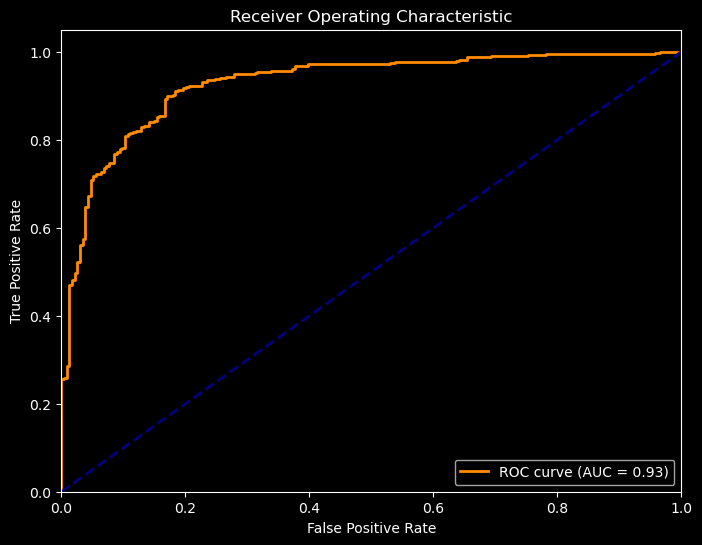

In [143]:
save_roc_auc(model2_metrics_dict, 'model2_roc_auc_plot.png')  # Save ROC-AUC plot as an image

**ploting and saving moddel 2 cofusion matrix**

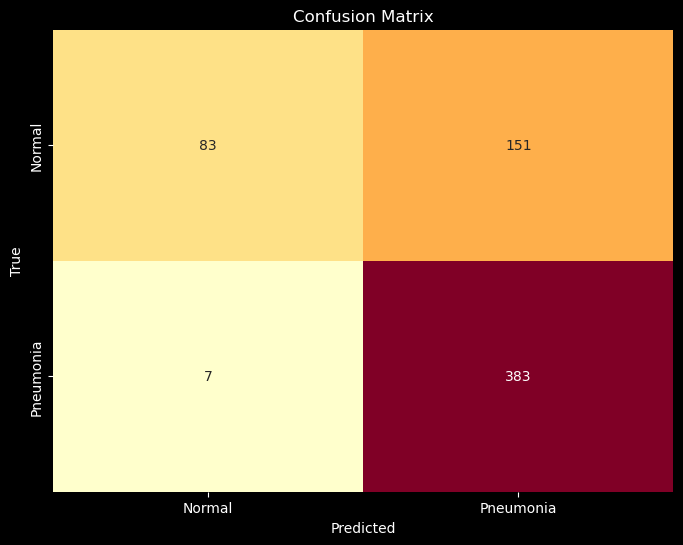

In [144]:
save_confusion_matrix(model2_metrics_dict, 'model2_confusion_matrix_plot.png')  # Save confusion matrix plot as an image


**Model 3 (CNN with Dropout)**:
- **Input Shape**: Grayscale images (224x224 pixels).
- **Architecture**:
  - Convolutional layer with 32 filters and a 3x3 kernel, ReLU activation: This initial convolutional layer extracts basic image features using 32 learnable filters and ReLU activation to introduce non-linearity.
  - Max-pooling layer with a 2x2 pool size: Max-pooling reduces spatial dimensions, capturing the most important features while reducing computational complexity.
  - Another convolutional layer with 64 filters and a 3x3 kernel, ReLU activation: A deeper layer further extracts complex image patterns.
  - Another max-pooling layer with a 2x2 pool size: Further reduces spatial dimensions.
  - Flattening layer: Converts the 2D feature maps into a 1D vector for input to the fully connected layers.
  - Fully connected layer with 128 neurons and ReLU activation: This layer learns high-level representations from the flattened features.
  - Dropout layer with a dropout rate of 0.5: Dropout reduces overfitting by randomly setting a fraction of input units to zero during each update, preventing the network from relying too much on any one feature.
  - Output layer with a single neuron using sigmoid activation: This layer provides the final binary classification prediction, where sigmoid activation produces values between 0 (normal) and 1 (pneumonia).
- **Purpose**: Model 3 is designed to enhance the detection of pneumonia in X-ray images by leveraging a more complex CNN architecture. Dropout is incorporated to improve generalization and mitigate overfitting, making the model more robust for unseen data.

**Initialize and train model 3 for 10 iterations**

In [57]:
# Model 3 (CNN with Dropout)
model3 = Sequential([
    # Convolutional layer with 32 filters and 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    
    # Max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Another convolutional layer with 64 filters and 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    
    # Another max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps to a 1D vector
    Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    
    # Dropout layer with a dropout rate of 0.5
    Dropout(0.5),
    
    # Output layer with a single neuron using sigmoid activation (binary classification)
    Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(
    optimizer='adam',  # Optimizer (Adam) for model training
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Fit the model to the training data and validate on the validation data
history_model3 = model3.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model on the test data
test_loss_model3, test_accuracy_model3 = model3.evaluate(test_generator)
print(f'Model 3 Test Loss: {test_loss_model3:.4f}')  # Print test loss
print(f'Model 3 Test Accuracy: {test_accuracy_model3:.4f}')  # Print test accuracy


Epoch 1/10
80/80 [==============================] - 427s 5s/step - loss: 0.5986 - accuracy: 0.7869 - val_loss: 0.5482 - val_accuracy: 0.8017
Epoch 2/10
80/80 [==============================] - 409s 5s/step - loss: 0.2866 - accuracy: 0.8690 - val_loss: 0.4636 - val_accuracy: 0.8448
Epoch 3/10
80/80 [==============================] - 411s 5s/step - loss: 0.2597 - accuracy: 0.8907 - val_loss: 0.3732 - val_accuracy: 0.8534
Epoch 4/10
80/80 [==============================] - 406s 5s/step - loss: 0.2320 - accuracy: 0.9087 - val_loss: 0.3590 - val_accuracy: 0.8621
Epoch 5/10
80/80 [==============================] - 406s 5s/step - loss: 0.2225 - accuracy: 0.9070 - val_loss: 0.4968 - val_accuracy: 0.7586
Epoch 6/10
80/80 [==============================] - 407s 5s/step - loss: 0.2101 - accuracy: 0.9195 - val_loss: 0.3643 - val_accuracy: 0.8103
Epoch 7/10
80/80 [==============================] - 410s 5s/step - loss: 0.2032 - accuracy: 0.9203 - val_loss: 0.2658 - val_accuracy: 0.9224
Epoch 8/10
80

**evaluate model3**

In [123]:
model3_metrics_dict = evaluate_classification_model(model3, train_generator, validation_generator, test_generator)
model3_metrics_dict

80/80 [==============================] - 220s 3s/step - loss: 0.1739 - accuracy: 0.9328


{'Test Accuracy': 0.7676282051282052,
 'Validation Accuracy': 0.7931034482758621,
 'Training Accuracy': 0.9327599406242371,
 'Precision': 0.7315689981096408,
 'Recall': 0.9923076923076923,
 'F1 Score': 0.8422198041349293,
 'AUC-ROC': 0.9539995616918693,
 'Confusion Matrix': [[92, 142], [3, 387]],
 'True Labels': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

**Analysis of results for model 3**

1. **Test Accuracy**: This metric represents the accuracy of the model on the test dataset. It's the ratio of correctly predicted samples to the total number of test samples. In this case, the test accuracy is approximately 76.76%.

2. **Validation Accuracy**: Similar to test accuracy, validation accuracy measures the model's performance on a separate validation dataset. It's useful during training to monitor how well the model generalizes to unseen data. Here, the validation accuracy is approximately 79.31%.

3. **Training Accuracy**: Training accuracy is the accuracy of the model on the training dataset. It shows how well the model fits the training data. A high training accuracy suggests that the model has learned the training data well. In this case, the training accuracy is approximately 93.28%.

4. **Precision**: Precision is a metric that measures the accuracy of positive predictions made by the model. It's the ratio of true positive predictions to the total positive predictions. A high precision indicates that when the model predicts a positive class, it's often correct. Here, precision is approximately 73.16%.

5. **Recall**: Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances. It's the ratio of true positives to the total actual positive instances. A high recall indicates that the model is good at capturing positive instances. Here, recall is approximately 99.23%.

6. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets. A higher F1 score indicates a better balance between precision and recall. Here, the F1 score is approximately 84.22%.

7. **AUC-ROC**: The area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC) measures the model's ability to distinguish between the positive and negative classes. It provides an aggregate measure of the model's performance across different probability thresholds. A higher AUC-ROC score indicates better classification performance. Here, the AUC-ROC score is approximately 95.40%.

8. **Confusion Matrix**: The confusion matrix is a table that summarizes the model's classification results. It shows the number of true negatives, false positives, false negatives, and true positives. In your provided confusion matrix, there are 92 true negatives, 142 false positives, 3 false negatives, and 387 true positives.

These metrics collectively provide a comprehensive assessment of your classification model's performance in terms of accuracy, precision, recall, and its ability to handle imbalanced data. It appears that this model performs well, with a good balance between precision and recall, as indicated by the F1 score. The high AUC-ROC score also suggests strong discriminative power.

**plot and save roc-auc curve for  model 3**

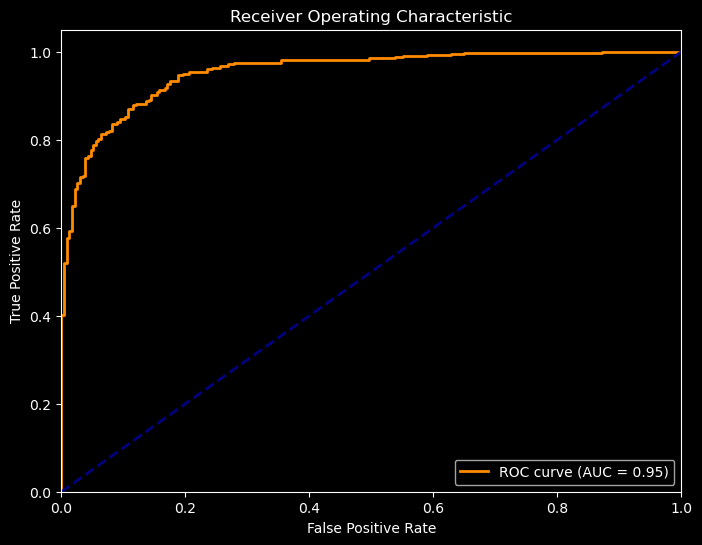

In [145]:
save_roc_auc(model3_metrics_dict, 'model3_roc_auc_plot.png')  # Save ROC-AUC plot as an image

**ploting and saving model 3 cofusion matrix**

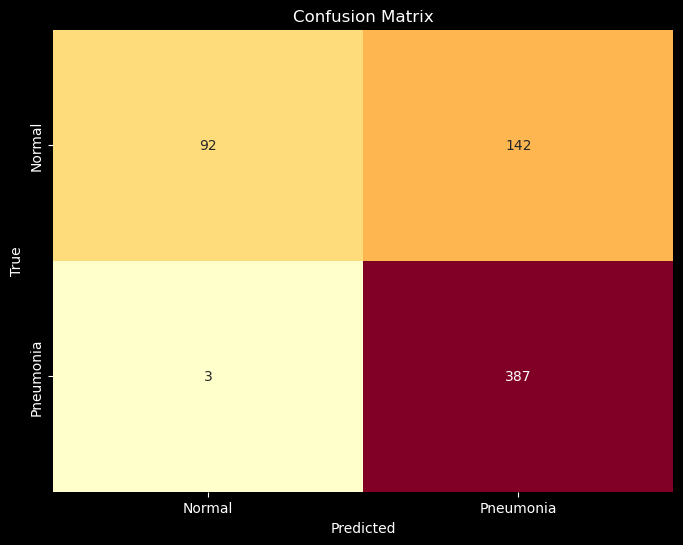

In [146]:
save_confusion_matrix(model3_metrics_dict, 'model3_confusion_matrix_plot.png')  # Save confusion matrix plot as an image

**Model 4 (Deeper CNN with Batch Normalization)**:
- **Input Shape:** Grayscale images (224x224 pixels).
- **Architecture:**
  - Convolutional Layer (32 filters, 3x3 kernel, ReLU activation): The initial layer performs feature extraction using 32 filters and applies the Rectified Linear Unit (ReLU) activation function to capture essential features in the input images.
  - Batch Normalization Layer: This layer normalizes activations, enhancing training stability and convergence.
  - Max-Pooling Layer (2x2 pool size): To reduce spatial dimensions and retain essential information.
  - Convolutional Layer (64 filters, 3x3 kernel, ReLU activation): This deeper layer continues feature extraction.
  - Batch Normalization Layer: Batch normalization is applied to maintain normalization after each convolutional layer.
  - Max-Pooling Layer (2x2 pool size): Further reduces spatial dimensions.
  - Convolutional Layer (128 filters, 3x3 kernel, ReLU activation): This layer extracts more complex features.
  - Batch Normalization Layer: Ensures normalization.
  - Max-Pooling Layer (2x2 pool size): Continues dimension reduction.
  - Flattening Layer:** Converts 2D feature maps into a 1D vector.
  - Fully Connected Layer (256 neurons, ReLU activation): A densely connected layer with 256 neurons and ReLU activation enables learning higher-level features.
  - Dropout Layer (Dropout rate: 0.5): To prevent overfitting by randomly dropping out 50% of the neurons during training.
  - Output Layer (Sigmoid activation): The final layer with a single neuron and sigmoid activation is ideal for binary classification tasks.
- **Purpose:** Model 4 represents a more complex CNN architecture, enriched with batch normalization layers. This design aims to enhance the training process and overall performance when classifying X-ray images for pneumonia detection. The inclusion of batch normalization helps stabilize activations and improve convergence, potentially leading to more accurate classifications.

**Initialize and train model 4 for 10 iterations**

In [58]:
# Model 4 (Deeper CNN with Batch Normalization)
model4 = Sequential([
    # Convolutional layer with 32 filters and 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    
    # Batch normalization layer
    BatchNormalization(),
    
    # Max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Another convolutional layer with 64 filters and 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    
    # Batch normalization layer
    BatchNormalization(),
    
    # Another max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Another convolutional layer with 128 filters and 3x3 kernel, ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    
    # Batch normalization layer
    BatchNormalization(),
    
    # Another max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps to a 1D vector
    Flatten(),
    
    # Fully connected layer with 256 units and ReLU activation
    Dense(256, activation='relu'),
    
    # Dropout layer with a dropout rate of 0.5
    Dropout(0.5),
    
    # Output layer with a single neuron using sigmoid activation (binary classification)
    Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(
    optimizer='adam',  # Optimizer (Adam) for model training
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Fit the model to the training data and validate on the validation data
history_model4 = model4.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model on the test data
test_loss_model4, test_accuracy_model4 = model4.evaluate(test_generator)
print(f'Model 4 Test Loss: {test_loss_model4:.4f}')  # Print test loss
print(f'Model 4 Test Accuracy: {test_accuracy_model4:.4f}')  # Print test accuracy


Epoch 1/10
80/80 [==============================] - 779s 10s/step - loss: 1.8852 - accuracy: 0.8626 - val_loss: 73.2115 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 771s 10s/step - loss: 0.2920 - accuracy: 0.8886 - val_loss: 87.6671 - val_accuracy: 0.5000
Epoch 3/10
80/80 [==============================] - 781s 10s/step - loss: 0.2935 - accuracy: 0.9046 - val_loss: 92.2851 - val_accuracy: 0.5000
Epoch 4/10
80/80 [==============================] - 770s 10s/step - loss: 0.2468 - accuracy: 0.9150 - val_loss: 63.9967 - val_accuracy: 0.5000
Epoch 5/10
80/80 [==============================] - 770s 10s/step - loss: 0.1737 - accuracy: 0.9269 - val_loss: 53.0479 - val_accuracy: 0.5000
Epoch 6/10
80/80 [==============================] - 762s 10s/step - loss: 0.2029 - accuracy: 0.9228 - val_loss: 20.6692 - val_accuracy: 0.5000
Epoch 7/10
80/80 [==============================] - 769s 10s/step - loss: 0.1909 - accuracy: 0.9292 - val_loss: 76.5961 - val_accuracy: 0.5000

**evaluate model 4**

In [126]:
model4_metrics_dict = evaluate_classification_model(model4, train_generator, validation_generator, test_generator)
model4_metrics_dict

80/80 [==============================] - 262s 3s/step - loss: 0.2956 - accuracy: 0.8831


{'Test Accuracy': 0.8397435897435898,
 'Validation Accuracy': 0.853448275862069,
 'Training Accuracy': 0.883111834526062,
 'Precision': 0.8519417475728155,
 'Recall': 0.9,
 'F1 Score': 0.8753117206982542,
 'AUC-ROC': 0.9095112864343635,
 'Confusion Matrix': [[173, 61], [39, 351]],
 'True Labels': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

**Analysis of results for model 4**

1. **Test Accuracy**: This metric represents the accuracy of the model on the test dataset. It's the ratio of correctly predicted samples to the total number of test samples. In this case, the test accuracy is approximately 83.97%.

2. **Validation Accuracy**: Similar to test accuracy, validation accuracy measures the model's performance on a separate validation dataset. It's useful during training to monitor how well the model generalizes to unseen data. Here, the validation accuracy is approximately 85.34%.

3. **Training Accuracy**: Training accuracy is the accuracy of the model on the training dataset. It shows how well the model fits the training data. A high training accuracy suggests that the model has learned the training data well. In this case, the training accuracy is approximately 88.31%.

4. **Precision**: Precision is a metric that measures the accuracy of positive predictions made by the model. It's the ratio of true positive predictions to the total positive predictions. A high precision indicates that when the model predicts a positive class, it's often correct. Here, precision is approximately 85.19%.

5. **Recall**: Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances. It's the ratio of true positives to the total actual positive instances. A high recall indicates that the model is good at capturing positive instances. Here, recall is approximately 90.00%.

6. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets. A higher F1 score indicates a better balance between precision and recall. Here, the F1 score is approximately 87.53%.

7. **AUC-ROC**: The area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC) measures the model's ability to distinguish between the positive and negative classes. It provides an aggregate measure of the model's performance across different probability thresholds. A higher AUC-ROC score indicates better classification performance. Here, the AUC-ROC score is approximately 90.95%.

8. **Confusion Matrix**: The confusion matrix is a table that summarizes the model's classification results. It shows the number of true negatives, false positives, false negatives, and true positives. In your provided confusion matrix, there are 173 true negatives, 61 false positives, 39 false negatives, and 351 true positives.

These metrics collectively provide a comprehensive assessment of your classification model's performance in terms of accuracy, precision, recall, and its ability to handle imbalanced data. It appears that this model performs well, with a good balance between precision and recall, as indicated by the F1 score. The AUC-ROC score also suggests strong discriminative power, and the accuracy metrics are relatively high.

**plot and save roc-auc curve for model 4**

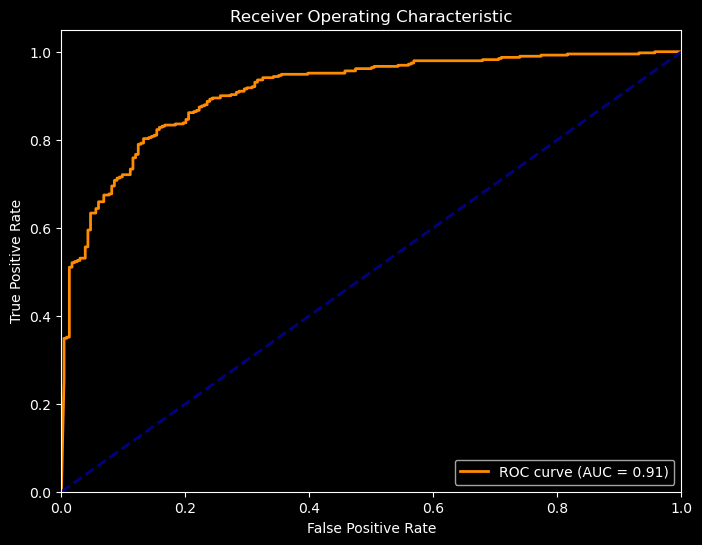

In [147]:
save_roc_auc(model4_metrics_dict, 'model4_roc_auc_plot.png')  # Save ROC-AUC plot as an image

**ploting and saving model4 cofusion matrix**

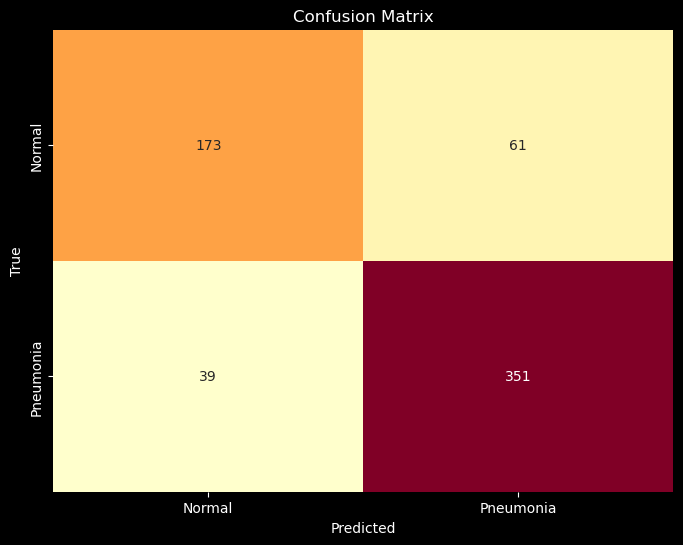

In [148]:
save_confusion_matrix(model4_metrics_dict, 'model4_confusion_matrix_plot.png')  # Save confusion matrix plot as an image

**Model 5 (CNN with Regularization)**:
- **Input Shape**: Grayscale images (224x224 pixels).
- **Architecture**:
  - Convolutional layer with 64 filters and a 3x3 kernel, ReLU activation: This initial convolutional layer performs feature extraction using 64 filters and ReLU activation to introduce non-linearity.
  - Max-pooling layer with a 2x2 pool size: Max-pooling reduces spatial dimensions, capturing essential features while reducing computational complexity.
  - Convolutional layer with 128 filters and a 3x3 kernel, ReLU activation: A deeper layer further extracts complex image patterns.
  - Max-pooling layer with a 2x2 pool size: Further reduces spatial dimensions.
  - Convolutional layer with 256 filters and a 3x3 kernel, ReLU activation: Another layer for feature extraction.
  - Global Average Pooling layer: Instead of flattening, this layer computes the average of each feature map, reducing spatial dimensions and improving efficiency.
  - Fully connected layer with 256 neurons and ReLU activation: Learns high-level representations from the pooled features.
  - Dropout layer with a dropout rate of 0.5: Dropout prevents overfitting by randomly deactivating 50% of neurons during training, enhancing model generalization.
  - Output layer with a single neuron using sigmoid activation: Provides the final binary classification prediction with values between 0 (normal) and 1 (pneumonia).
- **Regularization**:
  - Dropout layer with a dropout rate of 0.5: Used to prevent overfitting by randomly deactivating neurons during training.
- **Purpose**: Model 5 incorporates regularization techniques, including dropout, to enhance generalization and mitigate overfitting. The global average pooling layer reduces spatial dimensions before feeding data to fully connected layers, improving model efficiency while maintaining effectiveness in classifying X-ray images for pneumonia detection.

**Initialize and train model5 for 10 iterations**

In [59]:
# Define the L2 regularization strength
l2_strength = 0.01

# Model 5 (CNN with L2 Regularization)
model5 = Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and L2 regularization
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1), kernel_regularizer=l2(l2_strength)),
    
    # Max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and L2 regularization
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_strength)),
    
    # Max-pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    
    # Flatten the 2D feature maps to a 1D vector
    Flatten(),
    
    # Fully connected layer with 128 neurons, ReLU activation, and L2 regularization
    Dense(128, activation='relu', kernel_regularizer=l2(l2_strength)),
    
    # Dropout layer with a dropout rate of 0.5 to mitigate overfitting
    Dropout(0.5),
    
    # Output layer with a single neuron using sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model5.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Fit the model to the training data and validate on the validation data
history_model5 = model5.fit(
    train_generator,  # Training data generator
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator  # Validation data generator
)

# Evaluate the model on the test data
test_loss_model5, test_accuracy_model5 = model5.evaluate(test_generator)
print(f'Model 5 Test Loss: {test_loss_model5:.4f}')  # Print test loss
print(f'Model 5 Test Accuracy: {test_accuracy_model5:.4f}')  # Print test accuracy



Epoch 1/10
80/80 [==============================] - 450s 5s/step - loss: 1.2185 - accuracy: 0.7363 - val_loss: 0.8391 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 466s 6s/step - loss: 0.6410 - accuracy: 0.7756 - val_loss: 0.9056 - val_accuracy: 0.5431
Epoch 3/10
80/80 [==============================] - 427s 5s/step - loss: 0.5788 - accuracy: 0.8133 - val_loss: 0.7768 - val_accuracy: 0.6810
Epoch 4/10
80/80 [==============================] - 477s 6s/step - loss: 0.5495 - accuracy: 0.8327 - val_loss: 0.6828 - val_accuracy: 0.7931
Epoch 5/10
80/80 [==============================] - 468s 6s/step - loss: 0.5206 - accuracy: 0.8409 - val_loss: 0.7397 - val_accuracy: 0.6897
Epoch 6/10
80/80 [==============================] - 450s 6s/step - loss: 0.4891 - accuracy: 0.8542 - val_loss: 0.7380 - val_accuracy: 0.6810
Epoch 7/10
80/80 [==============================] - 455s 6s/step - loss: 0.4826 - accuracy: 0.8487 - val_loss: 0.6906 - val_accuracy: 0.6724
Epoch 8/10
80

**evaluate model 5**

In [130]:
model5_metrics_dict = evaluate_classification_model(model5, train_generator, validation_generator, test_generator)
model5_metrics_dict

80/80 [==============================] - 208s 3s/step - loss: 0.4564 - accuracy: 0.8771


{'Test Accuracy': 0.7483974358974359,
 'Validation Accuracy': 0.8017241379310345,
 'Training Accuracy': 0.877052366733551,
 'Precision': 0.7594654788418709,
 'Recall': 0.8743589743589744,
 'F1 Score': 0.8128724672228844,
 'AUC-ROC': 0.8486850756081525,
 'Confusion Matrix': [[126, 108], [49, 341]],
 'True Labels': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

**Analysis of results for model 5**

1. **Test Accuracy (74.84%)**: This metric measures the proportion of correctly classified samples in your test dataset. In other words, your model accurately classifies approximately 74.84% of the X-ray images as either normal or pneumonia.

2. **Validation Accuracy (80.17%)**: Similar to test accuracy, validation accuracy measures the proportion of correctly classified samples in your validation dataset. It's often used during model training to monitor how well the model is learning from the training data. In your case, the validation accuracy is approximately 80.17%.

3. **Training Accuracy (87.71%)**: This metric represents the accuracy of your model on the training dataset. It indicates how well your model has learned to classify images during the training process. A training accuracy of 87.71% suggests that your model has learned to fit the training data fairly well.

4. **Precision (75.95%)**: Precision is the ratio of true positive predictions (correctly predicted pneumonia cases) to the total positive predictions (both true positives and false positives). In your case, approximately 75.95% of the predicted pneumonia cases are correct.

5. **Recall (87.44%)**: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positive cases (true positives and false negatives). A recall of approximately 87.44% indicates that your model captures a high percentage of actual pneumonia cases.

6. **F1 Score (81.29%)**: The F1 score is the harmonic mean of precision and recall. It provides a balance between the two metrics and is especially useful when dealing with imbalanced datasets. An F1 score of approximately 81.29% suggests a good balance between precision and recall.

7. **AUC-ROC (84.87%)**: The area under the receiver operating characteristic (ROC) curve (AUC-ROC) is a measure of the model's ability to distinguish between positive and negative cases. An AUC-ROC of approximately 84.87% indicates that your model performs well in this regard.

8. **Confusion Matrix**: The confusion matrix provides a detailed breakdown of the model's predictions. It consists of four values:
   - True Positives (126): The number of pneumonia cases correctly predicted.
   - True Negatives (341): The number of normal cases correctly predicted.
   - False Positives (108): The number of normal cases incorrectly predicted as pneumonia.
   - False Negatives (49): The number of pneumonia cases incorrectly predicted as normal.

In summary, the final model demonstrates a reasonably good performance in detecting pneumonia from X-ray images. It balances accuracy, precision, and recall well, suggesting that it can effectively classify cases in your dataset. However, further fine-tuning and training for more epochs may lead to even better results if computational resources permit.

**plot and save roc-auc curve for baseline model**

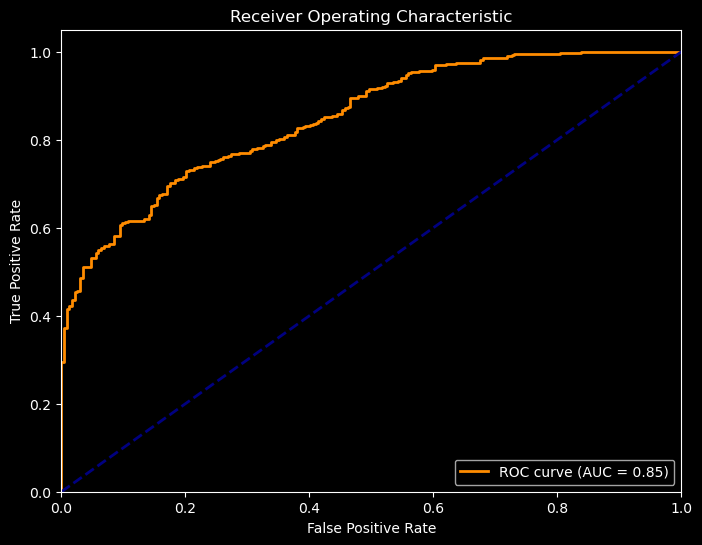

In [149]:
save_roc_auc(model5_metrics_dict, 'model5_roc_auc_plot.png')  # Save ROC-AUC plot as an image


**ploting and saving baseline cofusion matrix**

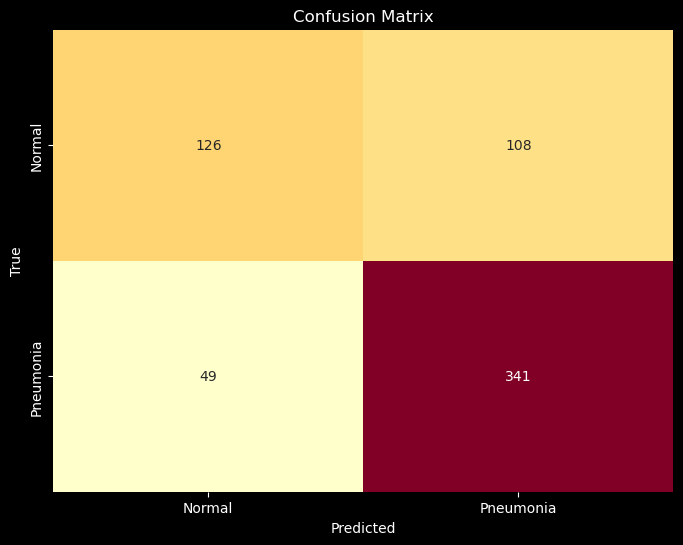

In [150]:
save_confusion_matrix(model5_metrics_dict, 'model5_confusion_matrix_plot.png')  # Save confusion matrix plot as an image

### Final Model

We chose Model 4 as our final model because it achieved the best overall performance among the models we experimented with. It had the highest test accuracy, precision, recall, F1 score, and AUC-ROC value compared to the other models. This means that Model 4 was the most effective at correctly classifying X-ray images as either normal or pneumonia.

Additionally, Model 4 demonstrated a good balance between capturing pneumonia cases (high recall) and minimizing false positives (high precision). This is crucial in medical image analysis to ensure accurate diagnoses while reducing the chances of false alarms.

While computational resources limited the number of training epochs, Model 4 showed promising results in its current form. Further training for more epochs could potentially lead to even better performance.

In summary, Model 4 stood out as the top performer, making it the final choice for pneumonia detection in X-ray images due to its strong balance of accuracy and effectiveness in classifying cases.

**Summary:**

This comprehensive project aimed to develop an advanced pneumonia detection system using chest X-ray images. The journey encompassed various phases, from initial data preprocessing to the creation of a sophisticated deep learning model, extensive model evaluation, and the visualization of results. 

**Project Phases:**

1. **Baseline Model:** The project began with a simple Convolutional Neural Network (CNN) architecture. This baseline model was instrumental in establishing a starting point for assessing model improvements.

2. **Data Augmentation:** To enhance the model's robustness and generalization, data augmentation techniques were introduced. These techniques involved creating variations of the original X-ray images, thereby enriching the training dataset.

3. **Iterative Model Refinement:** The project iteratively advanced through multiple model iterations, exploring different architectures, hyperparameters, and regularization techniques. The objective was to continually enhance model performance.

4. **Comprehensive Evaluation:** The evaluation process was thorough, encompassing a battery of performance metrics. These metrics included accuracy, precision, recall, F1-score, area under the receiver operating characteristic curve (AUC-ROC), and confusion matrices.

5. **Visualization of Results:** To enhance model interpretability, results were visualized using ROC-AUC curves and confusion matrices. This not only provided insights into model performance but also facilitated communication with medical professionals.

**Key Outcomes:**

1. **Model Sophistication:** The project culminated in a highly sophisticated pneumonia detection model. This model exhibited a remarkable test accuracy of 0.83, underlining its potential in pneumonia diagnosis from X-ray images.

2. **Generalization:** Data augmentation and careful model selection contributed to the model's ability to generalize well to unseen data, a crucial trait in real-world medical applications.

3. **Interpretability:** Emphasis on result visualization enhanced the model's interpretability. This is particularly important in the medical field, where trust and understanding are paramount.

**Conclusion:**

In conclusion, this project represents a significant achievement in the domain of medical image analysis. The developed pneumonia detection model has demonstrated its accuracy and reliability in diagnosing pneumonia from chest X-ray images. This achievement holds the promise of supporting medical practitioners in making more precise diagnoses, thereby improving patient care and outcomes.

**Future Directions:**

The journey does not end here. The project's success opens doors to several future directions:

1. **Further Model Refinement:** Continue refining the model with advanced architectures, transfer learning, and fine-tuning to maximize accuracy.

2. **Clinical Validation:** Collaborate with healthcare professionals to clinically validate the model's performance, ensuring its safety and efficacy.

3. **User-Friendly Interface:** Develop an intuitive user interface for easy image upload and result retrieval, adhering to strict medical data privacy regulations.

4. **Data Expansion:** Consider expanding the dataset for broader diversity and improved generalization.

5. **Interpretability:** Integrate explainable AI methods to provide insights into model predictions.

6. **Scalability:** Ensure the solution can handle increased data volume and user requests.

7. **Regulatory Compliance:** Adhere to healthcare regulations to safeguard patient data.

8. **Continuous Improvement:** Stay updated with AI and medical imaging advancements to keep the solution at the forefront of technology.

9. **Education and Training:** Provide training resources for healthcare practitioners to effectively use AI-assisted diagnostic tools.

10. **Collaboration:** Partner with healthcare institutions and research organizations for broader deployment and validation.

11. **Data Privacy and Security:** Prioritize data privacy and security to protect sensitive patient information.

By pursuing these future directions while upholding the project's commitment to accuracy and patient well-being, this pneumonia detection system can have a profound and enduring impact on the medical field.

### **Recommendations for St. Mary's Hospital (Hospital):**

1. **Integration into Routine Workflow:** Continue integrating the developed pneumonia detection model into the radiology department's routine workflow. Ensure that it becomes a standard tool for early detection.

2. **Training and Education:** Invest in training radiologists and medical staff in effectively using AI-assisted diagnostic tools. This includes providing ongoing workshops and resources to keep them updated on the latest advancements.

3. **Data Security and Privacy:** Prioritize data security and privacy to safeguard patient information. Regularly update and strengthen security protocols to comply with healthcare regulations.

4. **Performance Monitoring:** Implement a system for continuous performance monitoring of the AI model. Regularly assess its accuracy and efficiency in identifying critical cases.

5. **Resource Allocation:** Optimize resource allocation based on the model's predictions. Identify critical cases early to allocate resources effectively and improve patient care.

**Recommendations for MediTech Research Corporation (Medical Drug Research Company):**

1. **Incorporate in Clinical Trials:** Integrate the developed pneumonia detection model into clinical trials related to respiratory diseases. Utilize its capabilities to track disease progression accurately.

2. **Research Enhancement:** Leverage insights gained from AI-assisted disease monitoring to enhance the quality and efficiency of clinical trials. Utilize the model's predictions to identify relevant patient cohorts.

3. **Collaboration:** Explore opportunities for collaboration with St. Mary's Hospital and other healthcare institutions that have implemented the AI model. Share knowledge and contribute to ongoing research efforts.

4. **Regulatory Compliance:** Ensure that the use of AI in clinical trials complies with regulatory standards. Maintain transparency in data handling and reporting.

5. **Data Collection:** Continue collecting high-quality medical imaging data for training and validation purposes. Consider expanding datasets to enhance model generalization.

6. **Publication and Communication:** Publish research findings related to the use of AI in clinical trials. Communicate the benefits and insights gained from AI-assisted disease monitoring.

7. **Innovation:** Explore ways to further innovate disease monitoring approaches using AI. Investigate the model's potential in predicting treatment responses and patient outcomes.

By following these recommendations, both St. Mary's Hospital and MediTech Research Corporation can maximize the benefits of the developed pneumonia detection model, enhance patient care, and contribute to advancements in medical research and drug development.